# Cryptocurrencies Analysis

### Importing libraries:

In [2]:
import re
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt

### Importing data from Wikipedia - List of cryptocurrencies

In [3]:
#Extracting the information from the web page.
res = requests.get("https://en.wikipedia.org/wiki/List_of_cryptocurrencies")
soup = BeautifulSoup(res.text, 'html.parser')

In [4]:
datos=soup.find_all('table')[0]
datos.find_all('tr')[1].find_all("td")[0]

<td>2009
</td>

In [5]:
def createDF(table):
    
    headers = [header.text[:-1] for header in datos.find_all('th')]
    data=[]
    for row in table.find_all('tr')[1:]:
        currency = {}
        for index,value in enumerate(row.find_all("td")):
            currency[headers[index]]=value.text[:-1]
        data.append(currency)
    data = pd.DataFrame(data)
    return data

wiki=createDF(datos)

In [6]:
def quitarBrackets():
    for columna in wiki:
        wiki[columna] = wiki[columna].str.replace(r"\[.*\]","")
    return wiki
clean_wiki = quitarBrackets()

In [7]:
def changeWiki():    
    for i in range(len(clean_wiki)):

        diccionario = {'EOS.IO':'EOS',
                       'Bitcoin-cash':'Bitcoin Cash', 
                       'Ether or "Ethereum"':'Ethereum'
                      }
        for x,y in diccionario.items(): 
                clean_wiki['Currency'].values[i] = clean_wiki['Currency'].values[i].replace(x, y)
    return clean_wiki

clean_wiki=changeWiki()

### Importing data from Kaggle - Historical data

In [8]:
historical_data = pd.read_csv("INPUT/consolidated_coin_data.csv",encoding='latin1')

In [9]:
def changeKaggle():    
    for i in range(len(historical_data)):

        diccionario = {'bitcoin':'Bitcoin',
                       'bitcoin-cash':'Bitcoin Cash', 
                       'eos':'EOS',
                       'ethereum':'Ethereum',
                       'litecoin':'Litecoin',
                       'stellar':'Stellar',
                       'tether':'Tether',
                       'xrp':'Ripple'
                      }
        for x,y in diccionario.items(): 
                historical_data['Currency'].values[i] = historical_data['Currency'].values[i].replace(x, y)
    return historical_data

clean_kaggle=changeKaggle()

# CONCLUSIONS - Merging both files

In [10]:
def merging():
    result=pd.merge(clean_wiki,
                   clean_kaggle,
                   on='Currency')
    return result[['Release','Currency','Symbol','Programming language of implementation','Notes','Date','Close','Market Cap']]
final_table=merging()

In [11]:
#Casting the columns that should be as float.
final_table['Close'] = final_table['Close'].str.replace(',', '').astype(float)
final_table['Market Cap']=final_table['Market Cap'].str.replace(',', '').astype(float)
final_table['Date']=pd.to_datetime(final_table['Date'])

In [12]:
#Exporting the file.
final_table.to_csv("OUTPUT/final_table.csv")

In [13]:
final_table

,Release,Currency,Symbol,Programming language of implementation,Notes,Date,Close,Market Cap
0,2009,Bitcoin,"BTC, XBT, ₿",C++,The first and most widely used decentralized l...,2019-12-04,7252.03,1.311431e+11
1,2009,Bitcoin,"BTC, XBT, ₿",C++,The first and most widely used decentralized l...,2019-12-03,7320.15,1.323599e+11
2,2009,Bitcoin,"BTC, XBT, ₿",C++,The first and most widely used decentralized l...,2019-12-02,7321.99,1.323790e+11
3,2009,Bitcoin,"BTC, XBT, ₿",C++,The first and most widely used decentralized l...,2019-12-01,7424.29,1.342151e+11
4,2009,Bitcoin,"BTC, XBT, ₿",C++,The first and most widely used decentralized l...,2019-11-30,7569.63,1.368294e+11
...,...,...,...,...,...,...,...,...
16879,2017,EOS,EOS,"WebAssembly, Rust, C, C++",Feeless Smart contract platform for decentrali...,2013-05-02,3.37,5.828798e+07
16880,2017,EOS,EOS,"WebAssembly, Rust, C, C++",Feeless Smart contract platform for decentrali...,2013-05-01,3.80,6.560460e+07
16881,2017,EOS,EOS,"WebAssembly, Rust, C, C++",Feeless Smart contract platform for decentrali...,2013-04-30,4.30,7.402092e+07
16882,2017,EOS,EOS,"WebAssembly, Rust, C, C++",Feeless Smart contract platform for decentrali...,2013-04-29,4.38,7.538896e+07


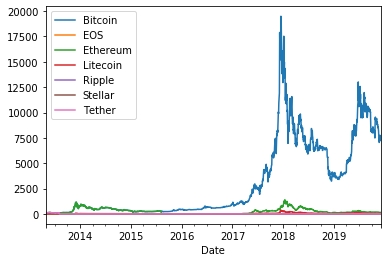

In [58]:
def graphic():
    fig, ax = plt.subplots()
    for label, grp in final_table.groupby('Currency'):
        a=grp.plot(x = 'Date', y = 'Close',ax = ax, label = label)
    return a
graphic()